In [4]:
import sys
sys.path.append('..')
from models.scnn_pytorch.model import SCNN
from models.erfnet.erfnet import ERFNet
import torch
import os
import cv2
import numpy as np
import time
import torchvision
import matplotlib.pyplot as plt

In [5]:
def GetRectFromRegion(region: np.array, width, height):
    x = float(width) * region[0]
    y = float(height) * region[1]
    region_width = float(width) * region[2]
    region_height = float(height) * region[3]
    return np.array([x, y, region_width, region_height], dtype=np.int)


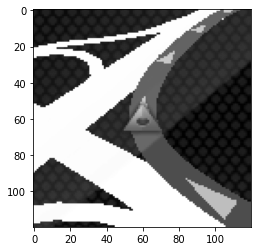

In [138]:
img = cv2.imread('../images/1592063181149.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

map_region = np.array([1626.0/1920, 800.0/1080, 120.0/1920, 120.0 / 1080 ])
rect = GetRectFromRegion(map_region, 1920, 1080)
map_img = img[rect[1]:rect[1] + rect[3], rect[0]:rect[0]+rect[2]]
plt.imshow(map_img, cmap='gray')

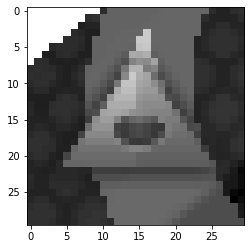

In [139]:
center_x = int(map_img.shape[0] / 2) - 15
center_y = int(map_img.shape[1] / 2) - 15
center_img = map_img[center_x:center_x+30, center_y:center_y+30]
plt.imshow(center_img, cmap='gray')

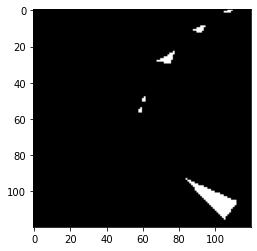

In [140]:
arrow_img = cv2.inRange(map_img, (150), (160))
plt.imshow(arrow_img, cmap='gray')

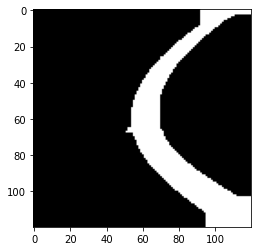

In [145]:
path = cv2.bitwise_or(cv2.inRange(map_img, (70), (90)), arrow_img)
path = cv2.dilate(path, np.ones([16,16]))
path = cv2.erode(path, np.ones([16,16]))

plt.imshow(path, cmap='gray')

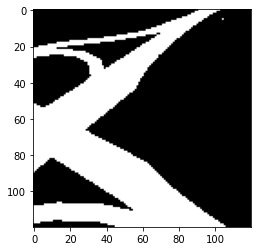

In [142]:
roads = cv2.inRange(map_img, (180), (255))
plt.imshow(roads, cmap='gray')

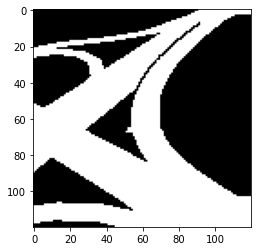

In [143]:
all_roads = cv2.bitwise_or(cv2.bitwise_or(roads, path), arrow_img)
plt.imshow(all_roads, cmap='gray')